In [1]:
import pandas as pd
from tqdm.auto import tqdm
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
import plotly.offline as py
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
import math
tqdm.pandas()

In [2]:
df = pd.read_csv('../dataset/cluster/2020-02-road2-in-5clusterp.csv',parse_dates=["datetime"])


In [3]:
# df = df[df['cluster'] == 4 ]
# df = df.reset_index(drop=True)
# df

In [4]:
df['date'] = pd.to_datetime(df['datetime']).dt.date
df['time'] = pd.to_datetime(df['datetime']).dt.time
df

,datetime,km,all_units,inflow_units,outflow_unit,samecell_units,avg_speed,max_speed,avg_traveltime,max_traveltime,inflow_units_N,outflow_units_N,avg_speed_N,road_number,road_direction,cluster,date,time
0,2020-02-01 00:00:00,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.092025,0.000000,2,in,3,2020-02-01,00:00:00
1,2020-02-01 00:30:00,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.092025,0.000000,2,in,3,2020-02-01,00:30:00
2,2020-02-01 01:00:00,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.092025,0.000000,2,in,3,2020-02-01,01:00:00
3,2020-02-01 01:30:00,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.092025,0.000000,2,in,3,2020-02-01,01:30:00
4,2020-02-01 02:00:00,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.092025,0.000000,2,in,3,2020-02-01,02:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685253,2020-02-29 19:30:00,508.0,0.111111,0.000000,1.111111,0.111111,5.222222,5.222222,0.0,0.0,0.000000,0.102249,0.050701,2,in,3,2020-02-29,19:30:00
685254,2020-02-29 20:00:00,508.0,0.666667,0.222222,0.333333,0.444444,29.333333,29.333333,0.0,0.0,0.019782,0.030675,0.284790,2,in,0,2020-02-29,20:00:00
685255,2020-02-29 20:30:00,508.0,0.250000,0.000000,1.000000,0.250000,19.000000,19.000000,0.0,0.0,0.000000,0.092025,0.184466,2,in,3,2020-02-29,20:30:00
685256,2020-02-29 21:00:00,508.0,0.250000,0.250000,0.750000,0.000000,8.750000,8.750000,0.0,0.0,0.022255,0.069018,0.084951,2,in,3,2020-02-29,21:00:00


In [5]:
# df[df['avg_speed']<=26]

In [6]:
# df['date'].value_counts()


In [7]:
# df['time'].value_counts()

In [8]:
df

,datetime,km,all_units,inflow_units,outflow_unit,samecell_units,avg_speed,max_speed,avg_traveltime,max_traveltime,inflow_units_N,outflow_units_N,avg_speed_N,road_number,road_direction,cluster,date,time
0,2020-02-01 00:00:00,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.092025,0.000000,2,in,3,2020-02-01,00:00:00
1,2020-02-01 00:30:00,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.092025,0.000000,2,in,3,2020-02-01,00:30:00
2,2020-02-01 01:00:00,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.092025,0.000000,2,in,3,2020-02-01,01:00:00
3,2020-02-01 01:30:00,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.092025,0.000000,2,in,3,2020-02-01,01:30:00
4,2020-02-01 02:00:00,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.092025,0.000000,2,in,3,2020-02-01,02:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685253,2020-02-29 19:30:00,508.0,0.111111,0.000000,1.111111,0.111111,5.222222,5.222222,0.0,0.0,0.000000,0.102249,0.050701,2,in,3,2020-02-29,19:30:00
685254,2020-02-29 20:00:00,508.0,0.666667,0.222222,0.333333,0.444444,29.333333,29.333333,0.0,0.0,0.019782,0.030675,0.284790,2,in,0,2020-02-29,20:00:00
685255,2020-02-29 20:30:00,508.0,0.250000,0.000000,1.000000,0.250000,19.000000,19.000000,0.0,0.0,0.000000,0.092025,0.184466,2,in,3,2020-02-29,20:30:00
685256,2020-02-29 21:00:00,508.0,0.250000,0.250000,0.750000,0.000000,8.750000,8.750000,0.0,0.0,0.022255,0.069018,0.084951,2,in,3,2020-02-29,21:00:00


In [9]:
df['label'] = df['cluster'].apply(lambda row: 1 if row == 3 else 0)
df

,datetime,km,all_units,inflow_units,outflow_unit,samecell_units,avg_speed,max_speed,avg_traveltime,max_traveltime,inflow_units_N,outflow_units_N,avg_speed_N,road_number,road_direction,cluster,date,time,label
0,2020-02-01 00:00:00,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.092025,0.000000,2,in,3,2020-02-01,00:00:00,1
1,2020-02-01 00:30:00,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.092025,0.000000,2,in,3,2020-02-01,00:30:00,1
2,2020-02-01 01:00:00,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.092025,0.000000,2,in,3,2020-02-01,01:00:00,1
3,2020-02-01 01:30:00,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.092025,0.000000,2,in,3,2020-02-01,01:30:00,1
4,2020-02-01 02:00:00,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.092025,0.000000,2,in,3,2020-02-01,02:00:00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685253,2020-02-29 19:30:00,508.0,0.111111,0.000000,1.111111,0.111111,5.222222,5.222222,0.0,0.0,0.000000,0.102249,0.050701,2,in,3,2020-02-29,19:30:00,1
685254,2020-02-29 20:00:00,508.0,0.666667,0.222222,0.333333,0.444444,29.333333,29.333333,0.0,0.0,0.019782,0.030675,0.284790,2,in,0,2020-02-29,20:00:00,0
685255,2020-02-29 20:30:00,508.0,0.250000,0.000000,1.000000,0.250000,19.000000,19.000000,0.0,0.0,0.000000,0.092025,0.184466,2,in,3,2020-02-29,20:30:00,1
685256,2020-02-29 21:00:00,508.0,0.250000,0.250000,0.750000,0.000000,8.750000,8.750000,0.0,0.0,0.022255,0.069018,0.084951,2,in,3,2020-02-29,21:00:00,1


In [10]:
df = df[df['avg_speed']<=40]


In [11]:
df

,datetime,km,all_units,inflow_units,outflow_unit,samecell_units,avg_speed,max_speed,avg_traveltime,max_traveltime,inflow_units_N,outflow_units_N,avg_speed_N,road_number,road_direction,cluster,date,time,label
0,2020-02-01 00:00:00,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.092025,0.000000,2,in,3,2020-02-01,00:00:00,1
1,2020-02-01 00:30:00,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.092025,0.000000,2,in,3,2020-02-01,00:30:00,1
2,2020-02-01 01:00:00,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.092025,0.000000,2,in,3,2020-02-01,01:00:00,1
3,2020-02-01 01:30:00,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.092025,0.000000,2,in,3,2020-02-01,01:30:00,1
4,2020-02-01 02:00:00,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.092025,0.000000,2,in,3,2020-02-01,02:00:00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685253,2020-02-29 19:30:00,508.0,0.111111,0.000000,1.111111,0.111111,5.222222,5.222222,0.0,0.0,0.000000,0.102249,0.050701,2,in,3,2020-02-29,19:30:00,1
685254,2020-02-29 20:00:00,508.0,0.666667,0.222222,0.333333,0.444444,29.333333,29.333333,0.0,0.0,0.019782,0.030675,0.284790,2,in,0,2020-02-29,20:00:00,0
685255,2020-02-29 20:30:00,508.0,0.250000,0.000000,1.000000,0.250000,19.000000,19.000000,0.0,0.0,0.000000,0.092025,0.184466,2,in,3,2020-02-29,20:30:00,1
685256,2020-02-29 21:00:00,508.0,0.250000,0.250000,0.750000,0.000000,8.750000,8.750000,0.0,0.0,0.022255,0.069018,0.084951,2,in,3,2020-02-29,21:00:00,1


In [12]:
df[df['label']==0]

,datetime,km,all_units,inflow_units,outflow_unit,samecell_units,avg_speed,max_speed,avg_traveltime,max_traveltime,inflow_units_N,outflow_units_N,avg_speed_N,road_number,road_direction,cluster,date,time,label
1476,2020-02-02 19:30:00,1.0,4.200000,2.700000,2.433333,1.500000,35.400000,52.366667,55.700000,66.033333,0.240356,0.223926,0.343689,2,in,4,2020-02-02,19:30:00,0
1477,2020-02-02 20:00:00,1.0,6.533333,4.100000,3.166667,2.433333,36.066667,54.766667,61.733333,76.366667,0.364985,0.291411,0.350162,2,in,1,2020-02-02,20:00:00,0
1576,2020-02-04 21:30:00,1.0,4.066667,3.066667,2.200000,1.000000,38.933333,53.433333,60.033333,72.900000,0.272997,0.202454,0.377994,2,in,4,2020-02-04,21:30:00,0
1763,2020-02-08 19:00:00,1.0,3.200000,2.366667,1.800000,0.833333,39.866667,51.433333,48.500000,56.766667,0.210682,0.165644,0.387055,2,in,2,2020-02-08,19:00:00,0
1768,2020-02-08 21:30:00,1.0,2.178571,1.571429,1.357143,0.607143,39.642857,48.071429,48.035714,52.750000,0.139890,0.124890,0.384882,2,in,2,2020-02-08,21:30:00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685246,2020-02-29 16:00:00,508.0,0.909091,0.090909,1.000000,0.818182,32.272727,32.636364,0.000000,0.000000,0.008093,0.092025,0.313327,2,in,0,2020-02-29,16:00:00,0
685248,2020-02-29 17:00:00,508.0,0.600000,0.200000,0.500000,0.400000,32.000000,32.000000,0.000000,0.000000,0.017804,0.046012,0.310680,2,in,0,2020-02-29,17:00:00,0
685249,2020-02-29 17:30:00,508.0,1.272727,0.363636,0.272727,0.909091,33.454545,36.000000,0.000000,0.000000,0.032371,0.025098,0.324801,2,in,0,2020-02-29,17:30:00,0
685254,2020-02-29 20:00:00,508.0,0.666667,0.222222,0.333333,0.444444,29.333333,29.333333,0.000000,0.000000,0.019782,0.030675,0.284790,2,in,0,2020-02-29,20:00:00,0


<AxesSubplot:>

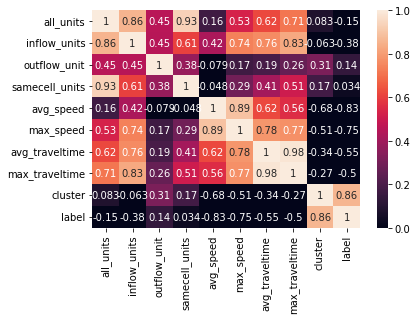

In [13]:
df_corr = df.filter(['all_units','inflow_units','outflow_unit','samecell_units','avg_speed','max_speed','avg_traveltime','max_traveltime','cluster','label'],axis=1)
corr = df_corr.corr()
sns.heatmap(corr, vmin=0, vmax=1, annot=True)

In [14]:
num_cols = ['all_units','inflow_units','outflow_unit','samecell_units','avg_speed','max_speed','avg_traveltime','max_traveltime']
X=df[num_cols]
y=df['label']

In [15]:
from sklearn.preprocessing import StandardScaler
scale = MinMaxScaler()
X = scale.fit_transform(X)


In [16]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np
param_grid = {'max_depth': np.arange(1, 10),
"min_samples_split": [2,5,7,10],
    "min_samples_leaf": [1,2,5],
 'criterion':['entropy','gini']}
tree = GridSearchCV(DecisionTreeClassifier(), param_grid,scoring='roc_auc',n_jobs=-1,cv=3)
tree.fit(X_train, y_train)


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 7, 10]},
             scoring='roc_auc')

In [18]:
tree.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=5,
                       min_samples_split=5)

In [19]:
tree.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'min_samples_leaf': 5,
 'min_samples_split': 5}

In [20]:
# tree = DecisionTreeClassifier(max_depth=6,min_samples_leaf=5,min_samples_split=2)
tree = DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=5,
                       min_samples_split=5,random_state=42)
tree.fit(X_train,y_train)
y_pred = tree.predict(X_test)
from sklearn.metrics import accuracy_score,classification_report
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9923802021080083
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     59027
           1       0.98      0.98      0.98     14597

    accuracy                           0.99     73624
   macro avg       0.99      0.99      0.99     73624
weighted avg       0.99      0.99      0.99     73624



In [21]:
from sklearn.tree import export_graphviz

tree_dot = export_graphviz(
tree,
out_file=None, # or out_file=”iris_tree.dot”
feature_names=num_cols,
class_names='Class',
rounded=True,
filled=True
)
print(tree_dot)

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label="avg_speed <= 0.568\nentropy = 0.721\nsamples = 149478\nvalue = [119658, 29820]\nclass = C", fillcolor="#eba06a"] ;
1 [label="avg_speed <= 0.534\nentropy = 0.311\nsamples = 29986\nvalue = [1674, 28312]\nclass = l", fillcolor="#45a3e7"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="inflow_units <= 0.07\nentropy = 0.086\nsamples = 26269\nvalue = [283, 25986]\nclass = l", fillcolor="#3b9ee5"] ;
1 -> 2 ;
3 [label="avg_speed <= 0.524\nentropy = 0.006\nsamples = 24304\nvalue = [11, 24293]\nclass = l", fillcolor="#399de5"] ;
2 -> 3 ;
4 [label="entropy = 0.0\nsamples = 23438\nvalue = [0, 23438]\nclass = l", fillcolor="#399de5"] ;
3 -> 4 ;
5 [label="outflow_unit <= 0.033\nentropy = 0.098\nsamples = 866\nvalue = [11, 855]\nclass = l", fillcolor="#3c9ee5"] ;
3 -> 5 ;
6 [label="inflow_units <= 0.046\nentropy = 0.76\nsamples = 50\nvalue =